In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [113]:
abalone_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/abalone.csv')
print(abalone_data.shape)
abalone_data.head()


(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [114]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations:
1. No missing value
2. All are continous values
3. Seems like there are outliers in height,weight,shucked weight

In [115]:
abalone_data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
label_enc=LabelEncoder()
abalone_data['Sex']=label_enc.fit_transform(abalone_data['Sex'])
abalone_data.head()
abalone_data_len_raw=abalone_data.shape[0]

In [118]:
abalone_data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [119]:
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Feature Engineering

In problem statement it is given that Rings+1.5 gives the age of the abalone in years.So we can add a age column as feature.

In [120]:
abalone_data['Age']=abalone_data['Rings']+1.5
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


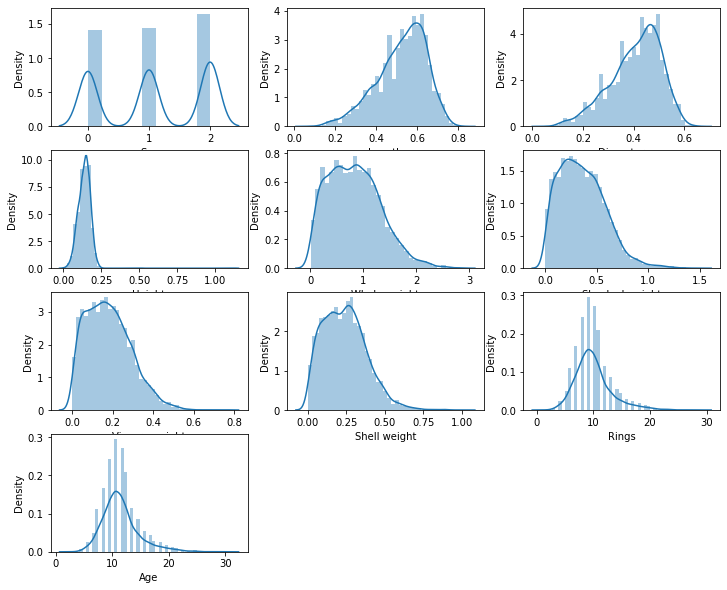

In [121]:
plt.figure(figsize=(12,10))
pltno=1
for col in abalone_data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.distplot(abalone_data[col])
    pltno+=1
plt.show()

Observations:
1.We have skewed data in Height, whole weight,shucked weight,viscera weight

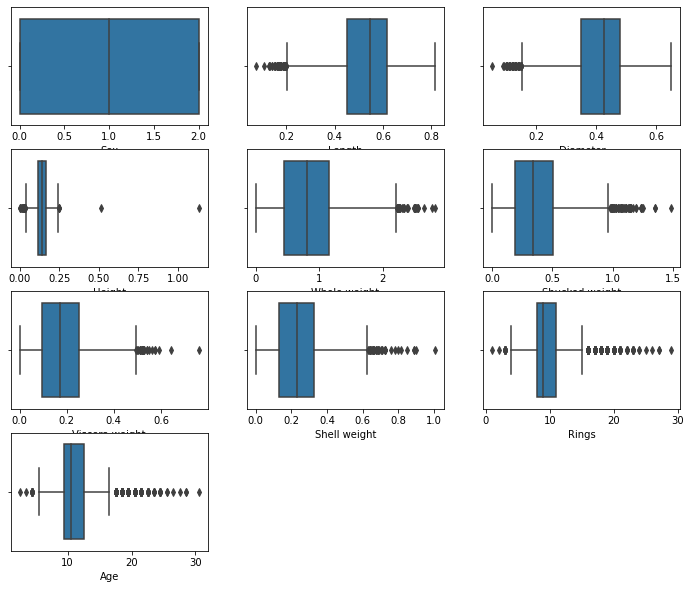

In [122]:
plt.figure(figsize=(12,10))
pltno=1
for col in abalone_data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(abalone_data[col])
    pltno+=1
plt.show()

In [123]:
abalone_data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

Observation
1. It is confirmed that we have outliers in Length,Diameter,Height,WholeWeight,Shucked Weight,Viscera weight,shell weight

In [124]:
from scipy.stats import zscore
zscore=zscore(abalone_data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']])
abs_score=np.abs(zscore)
filtering=(abs_score<3).all(axis=1)
abalone_data=abalone_data[filtering]
print(abalone_data.shape)
abalone_data_len_after_outliers_removal=abalone_data.shape[0]
abalone_data.describe()


(4027, 10)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,11.238763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,4.500000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,9.500000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,10.500000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,12.500000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,20.500000


Removed Outliers from Length,Diameter,Height,Whole weight,shucked weight,viscera weight,shell weight using Zscore method

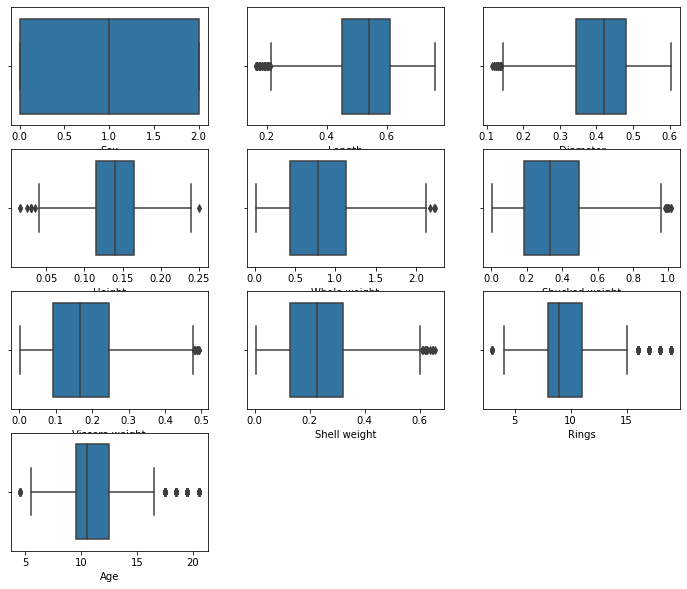

In [125]:
plt.figure(figsize=(12,10))
pltno=1
for col in abalone_data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(abalone_data[col])
    pltno+=1
plt.show()

We removed most of the outliers from the data set.Now the data set looks better and will go ahead with the current dataset.

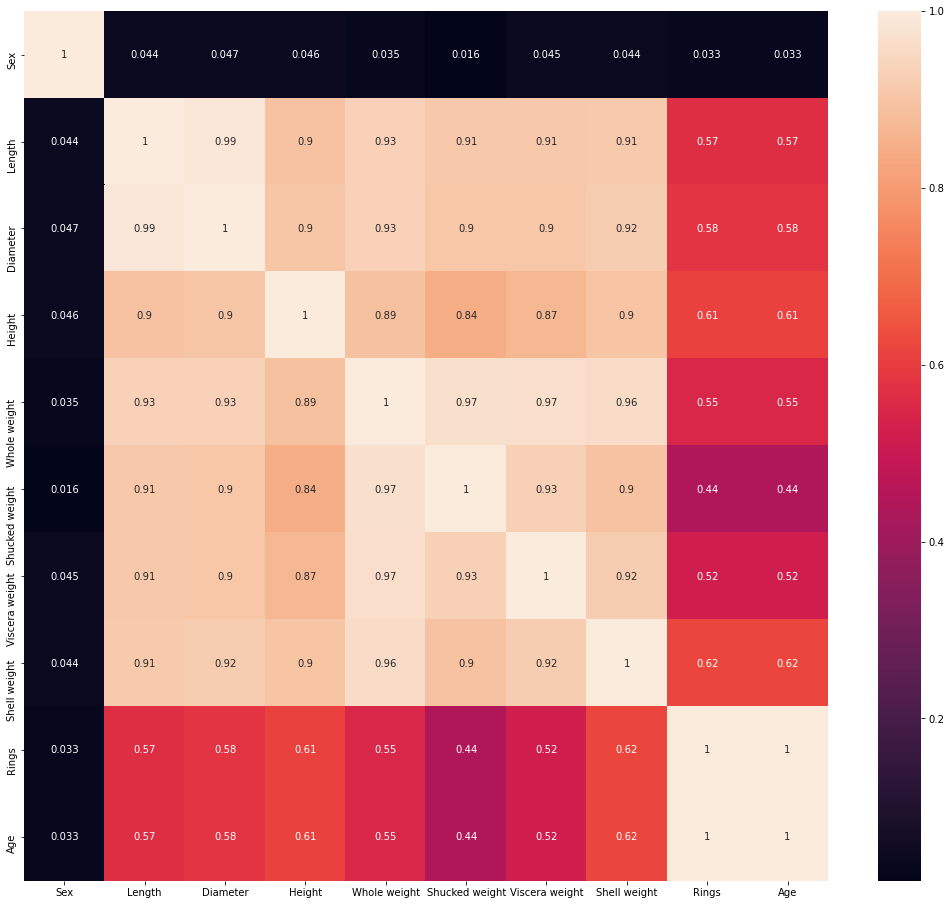

In [126]:
plt.figure(figsize=(18,16))
ab_corr=abalone_data.corr().abs()
sns.heatmap(ab_corr,annot=True)
plt.show()

Observations:
 1. Length and Diameter are 99% correlated with each other
 2. Length is contributing 54% and Diamtere is contributing 56%, hence we can remove Length
 3. Whole weight is 97% correlated with Shucked weight and Viscera weight. 
 4. Whole weight is contributing 53%, shucker weight is contributing 41% and Viscrea weight is contributing 50% to the target.
 5. Whole weight is 96% correlated with Shell weight and shell weight is contributing 62% to the target.

Conclusion:
Since we have small data set, lets go ahead and remove only Length feature, which is almost 99% correlated with Diameter.

In [127]:
abalone_data.drop(['Length'],axis=1,inplace=True)

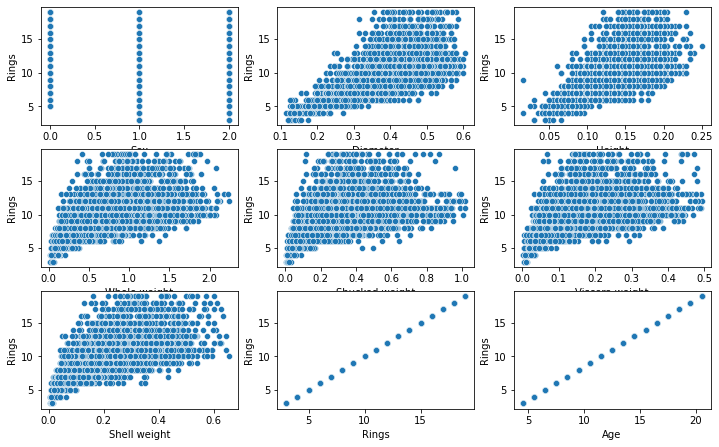

In [128]:
plt.figure(figsize=(12,10))
pltno=1
for col in abalone_data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.scatterplot(abalone_data[col],abalone_data['Rings'])
    pltno+=1
plt.show()

Observations:
 1. all the fields are positively correlated with target variable.
 

In [129]:
X=abalone_data.drop(['Rings'],axis=1)
y=abalone_data['Rings']

In [130]:
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=120)

# Linear Regression Model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [133]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Linear Regression')
print('====================================')
print('Trianing accuracy score: ',lr.score(X_train,y_train))
y_pred=lr.predict(X_test)
print('Test accuracy score: ',r2_score(y_test,y_pred))
print('Mean absolute error: ',(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))

Linear Regression
Trianing accuracy score:  1.0
Test accuracy score:  1.0
Mean absolute error:  7.523497437976235e-16
Mean squared error:  1.6051400146949882e-30


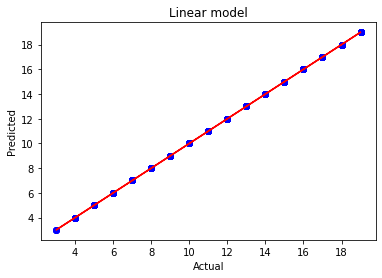

In [134]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear model')
plt.show()

Above plot shows the best fit line we found using the Linear Regression model.

## Regularization

In [135]:
from sklearn.linear_model import Ridge,RidgeCV

In [136]:
rdg_cv=RidgeCV(alphas=[0.1,0.01,0.001])
rdg_cv.fit(X_train,y_train)
print('Best alpha using RidgeCV: ',rdg_cv.alpha_)
for i in np.arange(10,80,10):   
    rdg=Ridge(rdg_cv.alpha_,i)
    rdg.fit(X_train,y_train)
    y_pred=rdg.predict(X_test)
    print('Test Accuracy with random state ',i,': ',r2_score(y_test,y_pred))

Best alpha using RidgeCV:  0.001
Test Accuracy with random state  10 :  0.9999999999997712
Test Accuracy with random state  20 :  0.9999999999997712
Test Accuracy with random state  30 :  0.9999999999997712
Test Accuracy with random state  40 :  0.9999999999997712
Test Accuracy with random state  50 :  0.9999999999997712
Test Accuracy with random state  60 :  0.9999999999997712
Test Accuracy with random state  70 :  0.9999999999997712


We get almost same score using regularization method as well. It shows our model is not overfitting.

# Ensemble model

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Hyper parameter tuning:

In [138]:
grd_param={'n_estimators':[120,130,140,150],
          'max_depth':[8,7,6]       
          }
grd_srch=GridSearchCV(RandomForestRegressor(),param_grid=grd_param)
grd_srch.fit(X_train,y_train)
print('Best hyper params using GridSearchCV: ',grd_srch.best_params_)

Best hyper params using GridSearchCV:  {'max_depth': 8, 'n_estimators': 120}


In [139]:
for i in np.arange(50,100,5):
    rf_reg=RandomForestRegressor(n_estimators=150,max_depth=6,random_state=i,)
    rf_reg.fit(X_train,y_train)
    y_pred=rf_reg.predict(X_test)
    print('Test accuracy for random state ',i,':',r2_score(y_test,y_pred))


Test accuracy for random state  50 : 0.9999999847883358
Test accuracy for random state  55 : 1.0
Test accuracy for random state  60 : 1.0
Test accuracy for random state  65 : 1.0
Test accuracy for random state  70 : 0.9999999340827885
Test accuracy for random state  75 : 1.0
Test accuracy for random state  80 : 0.9999999847883358
Test accuracy for random state  85 : 1.0
Test accuracy for random state  90 : 0.9999999898588905
Test accuracy for random state  95 : 1.0


It shows that model performs well with random state 65 and n_estimators=150 and max_depth=6

In [140]:
rf_reg=RandomForestRegressor(n_estimators=150,max_depth=6,random_state=65)
rf_reg.fit(X_train,y_train)
y_pred=rf_reg.predict(X_test)
print('RandomForest Regression')
print('====================================')
print('Trianing accuracy score: ',rf_reg.score(X_train,y_train))
print('Test accuracy score: ',r2_score(y_test,y_pred))
print('Mean absolute error: ',(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))

RandomForest Regression
Trianing accuracy score:  1.0
Test accuracy score:  1.0
Mean absolute error:  0.0
Mean squared error:  0.0


We built the model using the creterian as 'MSE'. So here we can consider the MSE metric to validate our model performance.
As we get MSE=0, it shows that we do not have any error in our model and it fits well.

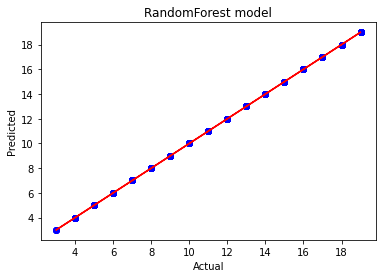

In [141]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest model')
plt.show()

Above is the best fit line using Random forest regressor model.

## Support Vector Machine 

In [142]:
from sklearn.svm import SVR

In [143]:
grd_param={'gamma':[0.1,0.5,1],'C':[0.01,0.1,1]}
grd_srch=GridSearchCV(SVR(),param_grid=grd_param)
grd_srch.fit(X_train,y_train)
print('Best hyper param using GridsearchCV: ',grd_srch.best_params_)

Best hyper param using GridsearchCV:  {'C': 1, 'gamma': 0.1}


In [144]:
svm=SVR(gamma=0.1,C=1,kernel='rbf',)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('SVM Regression')
print('====================================')
print('Trianing accuracy score: ',svm.score(X_train,y_train))
print('Test accuracy score: ',r2_score(y_test,y_pred))
print('Mean absolute error: ',(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))

SVM Regression
Trianing accuracy score:  0.9977547342167526
Test accuracy score:  0.997599007233168
Mean absolute error:  0.08377896185430023
Mean squared error:  0.02089889809664895


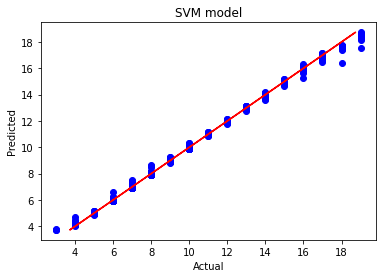

In [145]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM model')
plt.show()

## KNN Model

In [146]:
from sklearn.neighbors import KNeighborsRegressor
grd_param={'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
grd_srch=GridSearchCV(KNeighborsRegressor(),param_grid=grd_param)
grd_srch.fit(X_train,y_train)
print('Best hyper param using GridsearchCV: ',grd_srch.best_params_)

Best hyper param using GridsearchCV:  {'n_neighbors': 3}


In [147]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('SVM Regression')
print('====================================')
print('Trianing accuracy score: ',knn.score(X_train,y_train))
print('Test accuracy score: ',r2_score(y_test,y_pred))
print('Mean absolute error: ',(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))

SVM Regression
Trianing accuracy score:  0.9917101131195127
Test accuracy score:  0.9806811864795949
Mean absolute error:  0.23369745117510762
Mean squared error:  0.16815623965574314


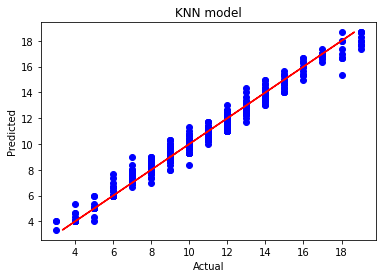

In [148]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN model')
plt.show()

Above plot shows the best fit line for KNN model

In [149]:
data_loss=(((abalone_data_len_raw) - (abalone_data_len_after_outliers_removal))/abalone_data_len_raw)*100
print('Data loss percentage: ',data_loss)

Data loss percentage:  3.5910940866650707


## Cross Validation scores for all the models

In [150]:
print("Cross validation score for Linear Regression: ",cross_val_score(lr,X_train,y_train,cv=5).mean())
print("Cross validation score for RandomForestRegressor: ",cross_val_score(rf_reg,X_train,y_train,cv=5).mean())
print("Cross validation score for SVM Regression: ",cross_val_score(svm,X_train,y_train,cv=5).mean())
print("Cross validation score for KNN model: ",cross_val_score(knn,X_train,y_train,cv=5).mean())

Cross validation score for Linear Regression:  1.0
Cross validation score for RandomForestRegressor:  0.9999999389408529
Cross validation score for SVM Regression:  0.9964627428669572
Cross validation score for KNN model:  0.9787809353327541


## Conclusion:

Based on the above cross validation scores
   1. Both LinearRegression and RandomForest Regression works well and gives almost same test accuracy score.
   2. But when we look at the MSE(Mean Squared Error), RandomForest Regression gives 0 error. Linear Regression model given error 1.6
   3. So based on MSE, we will go ahead with Random Forest Regression as it gives less error comparing to other models.

### Final model

In [151]:
rf_reg=RandomForestRegressor(n_estimators=150,max_depth=6,random_state=65)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=150, random_state=65)

### Saving the model using pickle

In [152]:
#Import Pickle
import pickle

In [153]:
#Saving the model
pickle.dump(rf_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/AbaloneCaseStudy.pkl','wb'))

In [154]:
#Loading the model
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/AbaloneCaseStudy.pkl','rb'))

In [155]:
y_pred=final_model.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.apply(np.ceil)

,Actual,Predicted
2994,9.0,9.0
397,8.0,8.0
671,17.0,17.0
1471,8.0,8.0
640,7.0,7.0
...,...,...
1606,10.0,10.0
3540,8.0,8.0
1275,9.0,9.0
3657,7.0,7.0
